<a href="https://colab.research.google.com/github/Team-Alpha-Squad/PRISM/blob/master/test/praveen/notebook/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df_cases =  pd.read_csv("https://raw.githubusercontent.com/Team-Alpha-Squad/PRISM/master/test/praveen/data/datasets_494724_1296467_time_series_covid_19_confirmed.csv")

In [ ]:
df_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,981,989,998,1004,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,7918,8113,8306,8503,8697,8857,8997,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076,12248,12445,12685,12968,13273,13571,13907
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,762,762,762,763,763,763,763,764,764,764,765,844,851,852,852,852,852,852,852,852,852,853,853,853,853,854,854,855,855,855,855,855,855,855,855,855,855,855,855,855
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,60,61,69,70,70,71,74,81,84,86,86,86,86,86,86,88,91,92,96,113,118,130,138,140,142,148,155,166,172,176,183,186,189,197,212,212,259,267,276,284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,251,251,251,299,441,443,458,463,479,483,484,484,484,485,499,499,513,513,514,611,632,639,659,661,662,671,683,688,693,698,698,702,707,710,711,712,713,713,713,714
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,209,212,222,233,249,256,278,283,310,323,354,399,419,453,469,482,484,496,524,560,591,632,705,728,844,885,902,909,919,922,941,967,992,1015,1076,1089,1103,1118,1128,1158
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,78,78,87,87,87,87,87,87,106,106,106,132,132,132,132,141,141,141,141,162,162,163,176,176,176,197,197,210,210,247,247,247,265,265,272,272,272,272,272,303
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2551,2738,2929,3100,3266,3424,3563,3686,3807,3930,4013,4100,4191,4289,4370,4453,4529,4609,4690,4763,4834,4902,4971,5035,5097,5160,5221,5279,5338,5399,5457,5513,5567,5630,5691,5747,5799,5849,5900,5900


In [ ]:
df_us = df_cases[(df_cases['Country/Region'] == "US")]
df_us

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20
225,NaN,US,37.0902,-95.7129,1,1,2,2,5,5,5,5,5,7,8,8,11,11,11,11,11,11,11,11,12,12,13,13,13,13,13,13,13,13,15,15,15,15,15,15,...,1608623,1630450,1651239,1670209,1689057,1707423,1730259,1754747,1778993,1799122,1816476,1837367,1857248,1878543,1903854,1926538,1944309,1961781,1979868,2000702,2023590,2048986,2074526,2094058,2114026,2137731,2163290,2191052,2222579,2255297,2281655,2312302,2347491,2382327,2422299,2467554,2510151,2548996,2590651,2635417


In [ ]:
date_wise_columns = df_us.columns[4:]
date_wise_columns

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '6/21/20', '6/22/20', '6/23/20', '6/24/20', '6/25/20', '6/26/20',
       '6/27/20', '6/28/20', '6/29/20', '6/30/20'],
      dtype='object', length=161)

In [ ]:
ls = list(map(int, np.linspace(0, 160, 161)))
ls[:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
us_cases = df_us.iloc[:, 4:].transpose()
us_cases[0:15]

,225
1/22/20,1
1/23/20,1
1/24/20,2
1/25/20,2
1/26/20,5
1/27/20,5
1/28/20,5
1/29/20,5
1/30/20,5
1/31/20,7


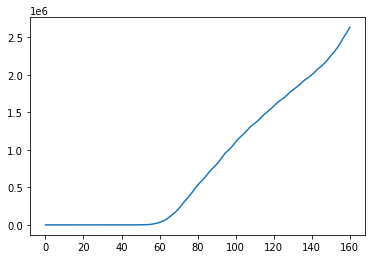

In [ ]:
plt.plot(ls, us_cases)
plt.show()

In [ ]:
us_cases_diff = list(np.diff(us_cases, axis = 0))
us_cases_diff[0:10]

[array([0]),
 array([1]),
 array([0]),
 array([3]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([2]),
 array([1])]

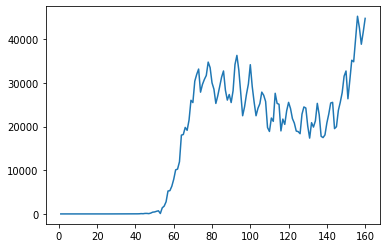

In [ ]:
plt.plot(ls[1:], us_cases_diff)
plt.show()

In [ ]:
date_wise_columns[145]

'6/15/20'

# **PAIR-WISE ANALYSIS**

**Industrial Production and New Orders**


In [12]:
df_ip = pd.read_excel("https://raw.githubusercontent.com/Team-Alpha-Squad/PRISM/master/test/praveen/data/fred_economic/Industrial%20Production%20Index.xls", skiprows= 10)
df_ip

,observation_date,INDPRO
0,2007-11-01,105.3338
1,2007-12-01,105.3457
2,2008-01-01,105.0619
3,2008-02-01,104.7094
4,2008-03-01,104.4616
...,...,...
146,2020-01-01,109.2128
147,2020-02-01,109.3608
148,2020-03-01,104.3554
149,2020-04-01,91.2823


In [11]:
df_new_orders = pd.read_excel("https://raw.githubusercontent.com/Team-Alpha-Squad/PRISM/master/test/praveen/data/fred_economic/New%20Orders%20and%20Shipments.xls", skiprows= 10)
df_new_orders

,observation_date,ANXAVS_NEWORDER
0,2007-11-01,129793
1,2007-12-01,133540
2,2008-01-01,133851
3,2008-02-01,131380
4,2008-03-01,131658
...,...,...
146,2020-01-01,133401
147,2020-02-01,132610
148,2020-03-01,130906
149,2020-04-01,122409


In [16]:
df_ip_new_order = df_ip
df_ip_new_order["ANXAVS_NEWORDER"] = df_new_orders["ANXAVS_NEWORDER"]
df_ip_new_order

,observation_date,INDPRO,ANXAVS_NEWORDER
0,2007-11-01,105.3338,129793
1,2007-12-01,105.3457,133540
2,2008-01-01,105.0619,133851
3,2008-02-01,104.7094,131380
4,2008-03-01,104.4616,131658
...,...,...,...
146,2020-01-01,109.2128,133401
147,2020-02-01,109.3608,132610
148,2020-03-01,104.3554,130906
149,2020-04-01,91.2823,122409


In [19]:
df_ip_new_order.describe()

,INDPRO,ANXAVS_NEWORDER
count,151.00000,151.000000
mean,101.47744,125832.894040
std,5.82893,9159.075681
min,87.07420,99477.000000
25%,97.66125,121360.000000
50%,102.53710,129044.000000
75%,105.37690,132483.000000
max,110.55160,138125.000000


In [22]:
df_ip_new_order["INDPRO"].max()

110.5516

In [17]:
df_ip_new_order.corr()

,INDPRO,ANXAVS_NEWORDER
INDPRO,1.000000,0.758199
ANXAVS_NEWORDER,0.758199,1.000000


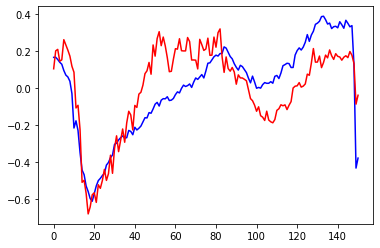

In [23]:
axes_151 = [num for num in range(151)]
plt.plot(axes_151, ((df_ip_new_order["INDPRO"]-df_ip_new_order["INDPRO"].mean())/(df_ip_new_order["INDPRO"].max()-df_ip_new_order["INDPRO"].min())), color = 'blue')
plt.plot(axes_151, ((df_ip_new_order["ANXAVS_NEWORDER"]-df_ip_new_order["ANXAVS_NEWORDER"].mean())/(df_ip_new_order["ANXAVS_NEWORDER"].max()-df_ip_new_order["ANXAVS_NEWORDER"].min())), color = 'red')
plt.show()